In [12]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import seaborn as sns
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [3]:
nc_filename=glob.glob('/ocean/xiaoxiny/research/nemo/NEMO-code/NEMOGCM/CONFIG/myIceplz/EXP00/ICEtest150.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/nemo/NEMO-code/NEMOGCM/CONFIG/myIceplz/EXP00/ICEtest150.nc']


In [4]:
ptrc_T=nc.Dataset(nc_filename[0])

lat = ptrc_T.variables['nav_lat'][:]
lon = ptrc_T.variables['nav_lon'][:]
Dis_Pa = ptrc_T.variables['TR_7'][:]
Par_Pa = ptrc_T.variables['TR_9'][:]
Dis_Th = ptrc_T.variables['TR_8'][:]
Par_Th = ptrc_T.variables['TR_10'][:]
depth = ptrc_T.variables['deptht'][:]
u=ptrc_T.variables['vozocrtx'][:]
v=ptrc_T.variables['vomecrty'][:]


Dis_Pa = np.ma.masked_equal(Dis_Pa,0)
Dis_Th = np.ma.masked_equal(Dis_Th,0)
Par_Pa = np.ma.masked_equal(Par_Pa,0)
Par_Th = np.ma.masked_equal(Par_Th,0)

In [6]:
layer=10

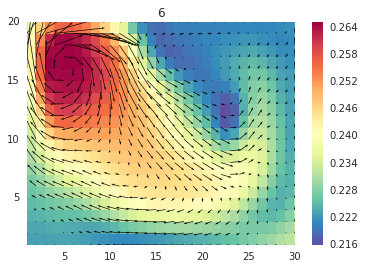

In [76]:
for i in range (6,7,1):
    time=i
    plt.pcolor(Dis_Pa[time,layer,:, :]/Dis_Th[time,layer,:, :],cmap='Spectral_r')
    plt.colorbar()
    #plt.contour(Dis_Th[time,layer,:, :],colors='k',ls=2)
    
    plt.quiver(u[time,layer,:,:], v[time,layer,:,:],scale=1)
    plt.title(time)
    #plt.contour(lon,[-75])
    plt.xlim(1,30)
    plt.ylim(1,20)
    plt.show()

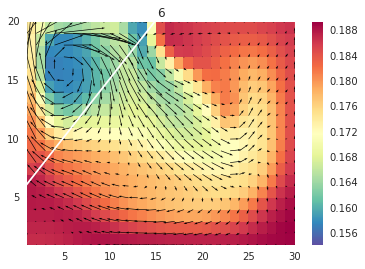

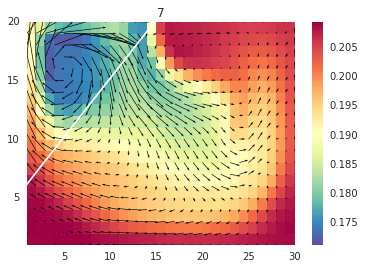

In [72]:
for i in range (6,8,1):
    time=i
    plt.pcolor(Dis_Th[time,layer,:, :],cmap='Spectral_r')
    plt.colorbar()
    #plt.contour(Dis_Th[time,layer,:, :],colors='k',ls=2)
    plt.contour(lon,[-75])
    plt.quiver(u[time,layer,:,:], v[time,layer,:,:],scale=1)
    plt.title(time)
    plt.xlim(1,30)
    plt.ylim(1,20)
    plt.show()

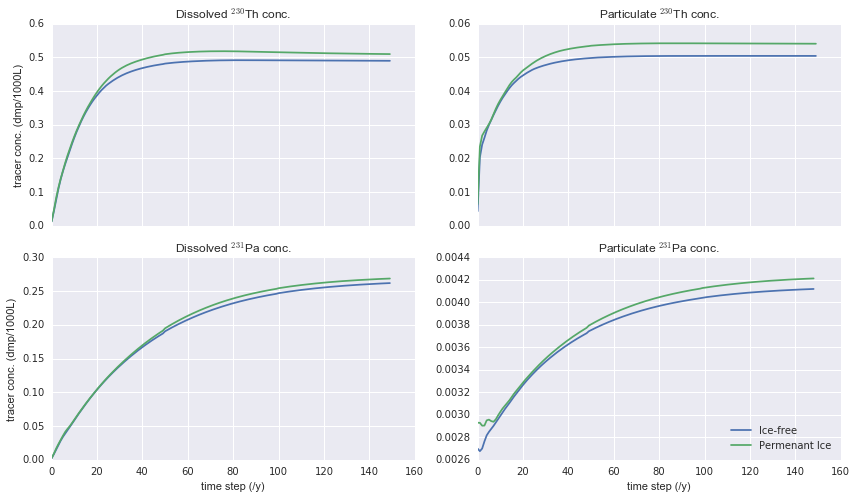

In [69]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,7))


ax=plt.subplot(223)
plt.plot(Dis_Pa[:,15,5,16]) 
plt.plot(Dis_Pa[:,15,5,26]) 
plt.title('Dissolved $^{231}$Pa conc.')
yyl=plt.ylabel('tracer conc. (dmp/1000L)')
plt.xlabel('time step (/y)')

plt.subplot(224)
plt.plot(Par_Pa[1:,15,5,16],label='Ice-free') 
plt.plot(Par_Pa[1:,15,5,26],label='Permenant Ice') 
plt.title('Particulate $^{231}$Pa conc.')
plt.xlabel('time step (/y)')

plt.legend(loc=4)



ax2=plt.subplot(222,sharex=ax)
plt.plot(Par_Th[:,15,5,16]) 
plt.plot(Par_Th[:,15,5,26]) 
plt.title('Particulate $^{230}$Th conc.')


ax1=plt.subplot(221,sharex=ax)
plt.plot(Dis_Th[:,15,5,16]) 
plt.plot(Dis_Th[:,15,5,26])
plt.title('Dissolved $^{230}$Th conc.')

yyl=plt.ylabel('tracer conc. (dmp/1000L)')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

plt.tight_layout()

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


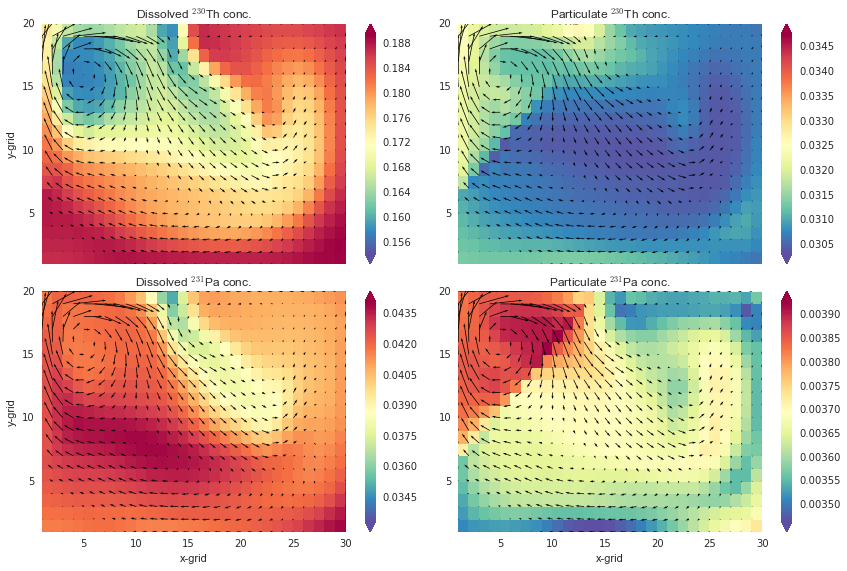

In [104]:
layer=10
time =6
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,8))


ax=plt.subplot(223)
plt.pcolor(Dis_Pa[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Dissolved $^{231}$Pa conc.')
yyl=plt.ylabel('y-grid')
plt.xlabel('x-grid')

plt.subplot(224)
plt.pcolor(Par_Pa[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Particulate $^{231}$Pa conc.')
plt.xlabel('x-grid')

plt.legend(loc=4)


ax2=plt.subplot(222,sharex=ax)
plt.pcolor(Par_Th[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Particulate $^{230}$Th conc.')


ax1=plt.subplot(221,sharex=ax)
plt.pcolor(Dis_Th[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Dissolved $^{230}$Th conc.')

yyl=plt.ylabel('y-grid')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

plt.tight_layout()

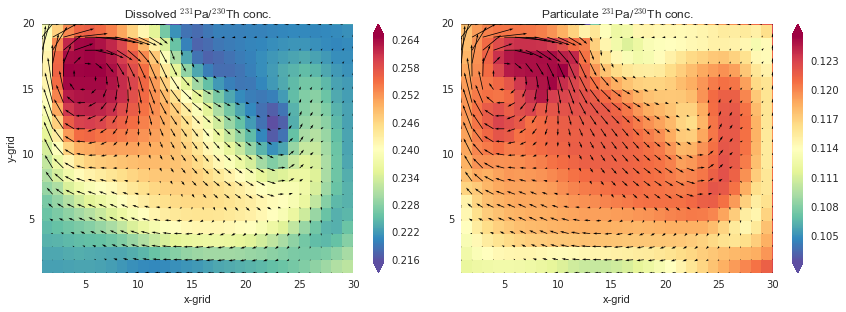

In [105]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,8))
ax2=plt.subplot(222,sharex=ax)
plt.pcolor(Par_Pa[time,layer,:, :]/Par_Th[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Particulate $^{231}$Pa/$^{230}$Th conc.')
plt.xlabel('x-grid')


ax1=plt.subplot(221,sharex=ax)
plt.pcolor(Dis_Pa[time,layer,:, :]/Dis_Th[time,layer,:, :],cmap='Spectral_r') 
plt.colorbar(extend='both')
plt.quiver(u[time,layer,:,:], v[time,layer,:,:])
plt.xlim(1,30)
plt.ylim(1,20)
plt.title('Dissolved $^{231}$Pa/$^{230}$Th conc.')
plt.ylabel('y-grid')
plt.xlabel('x-grid')
plt.tight_layout()